In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("bitcoinfinal.csv", header=None)
data.columns = ['Month', 'Rate']


In [48]:
data.set_index('Month', inplace=True)

In [49]:
data.head()

,Rate
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7


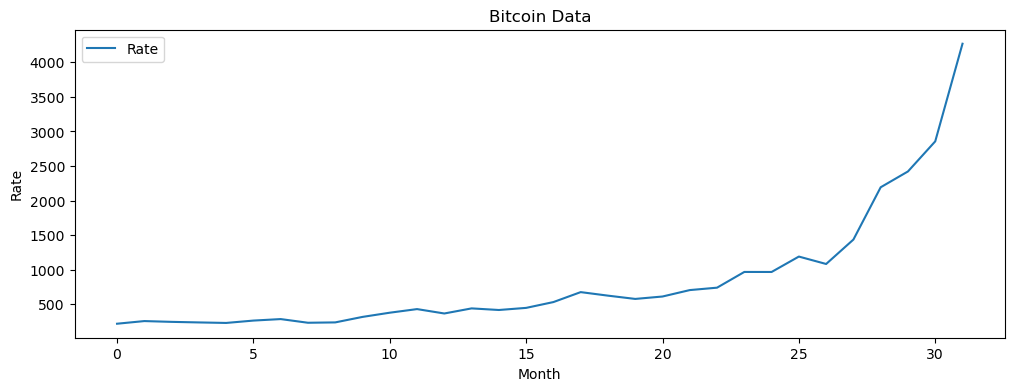

In [50]:
# Plotting the data
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitcoin Data')
plt.xlabel('Month')  # Label the x-axis as 'Year'
plt.ylabel('Rate')  # Label the y-axis as 'Number of Passengers'

# Display the plot
plt.show(block=False)

In [53]:
data.isnull().sum()

Rate    0
dtype: int64

In [ ]:
### Outlier Detection
### Box Plot and interquartile range

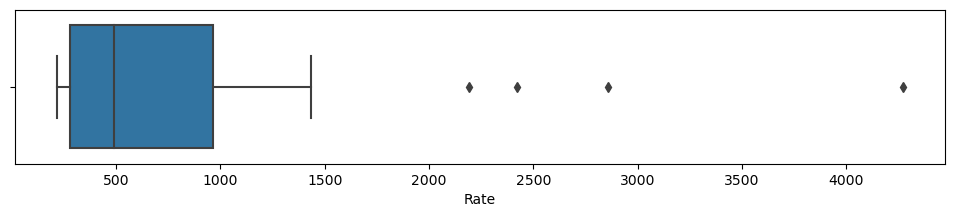

In [55]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax=sns.boxplot(x= data['Rate'], whis = 1.5)

In [56]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

In [58]:
IQR

Rate    687.2
dtype: float64

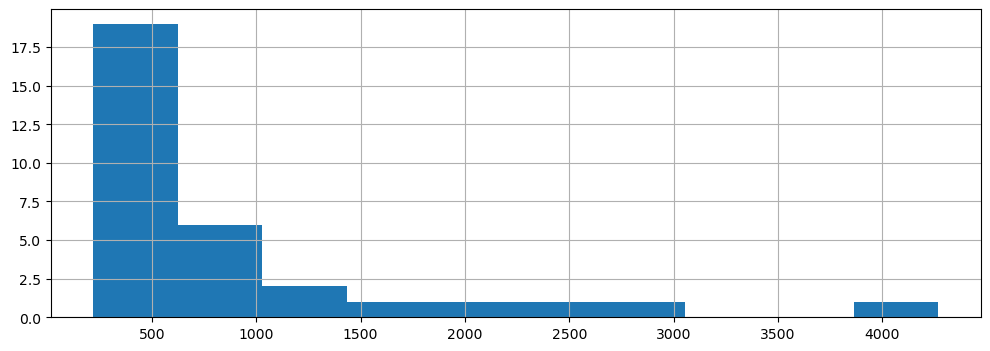

In [60]:
fig = data.Rate.hist(figsize=(12,4))

In [71]:
train_len =29
train = data[0:train_len] # First 120 lines
test = data[train_len:] 

In [72]:
y_hat_naive = test.copy()
###Calculating the next value based on the navive method
y_hat_naive['naive_forecast'] = train['Rate'][train_len -1]

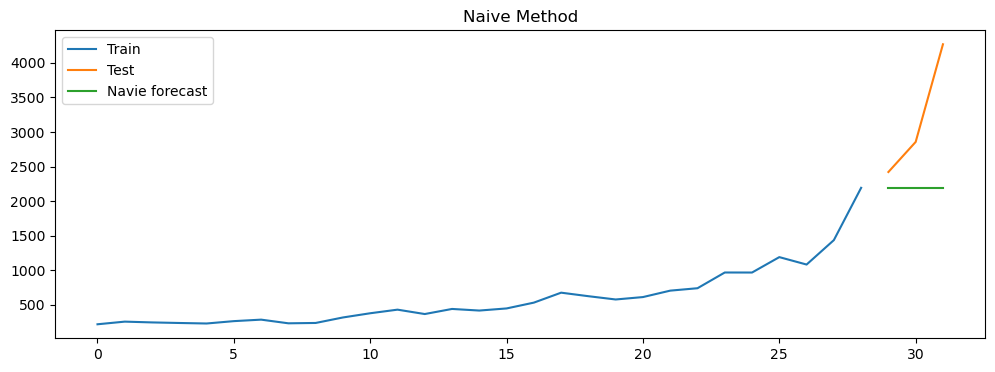

In [73]:
plt.figure(figsize=(12,4))
plt.plot(train['Rate'], label = 'Train')
plt.plot(test['Rate'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label='Navie forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [74]:
print(y_hat_naive['naive_forecast'])

Month
29    2191.8
30    2191.8
31    2191.8
Name: naive_forecast, dtype: float64


In [ ]:
### Simple Avg Method

In [75]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Rate'].mean()

In [76]:
print(y_hat_avg['avg_forecast'] )

Month
29    595.751724
30    595.751724
31    595.751724
Name: avg_forecast, dtype: float64


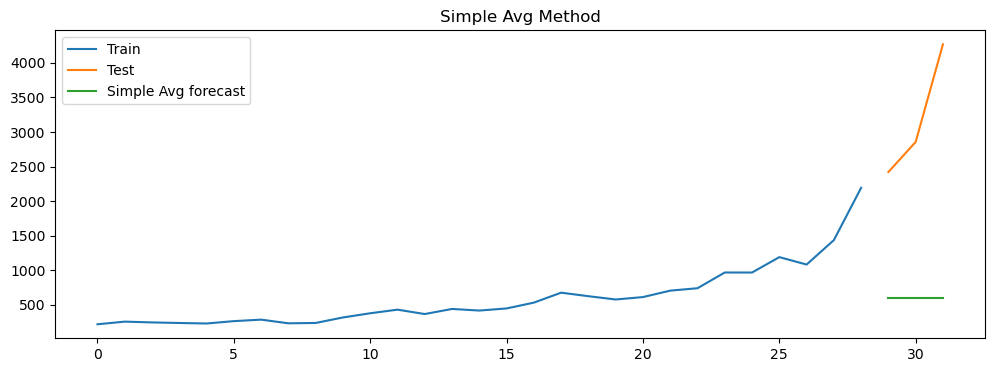

In [77]:
plt.figure(figsize=(12,4))
plt.plot(train['Rate'], label = 'Train')
plt.plot(test['Rate'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Avg forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()


In [ ]:
### RMSE and MAPE

In [79]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Rate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Rate']-y_hat_naive['naive_forecast'])/test['Rate'])*100,2)
results = pd.DataFrame({'Method' :['Naive method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [80]:
#Accuracy for Naive Average Method

accuracy = (1-(mape/100))*100
print("Accuracy", accuracy)

Accuracy 72.88


In [ ]:
### Calculate RMSE and MAPE to evaluate forecast

In [82]:
rmse = np.sqrt(mean_squared_error(test['Rate'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Rate']-y_hat_avg['avg_forecast'])/test['Rate'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple avg method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple avg method,2703.73,80.19


In [83]:
#Accuracy for Simple Average Method

accuracy = (1-(mape/100))*100
print("Accuracy", accuracy)

Accuracy 19.810000000000006


In [84]:
#Simple Moving Average

In [90]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Rate'].rolling(ma_window).mean() #Rolling 12 month average
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [91]:
rmse = np.sqrt(mean_squared_error(test['Rate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Rate']-y_hat_sma['sma_forecast'][train_len:])/test['Rate'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Average Method -3'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple avg method,2703.73,80.19
0,Simple Moving Average Method,2338.94,67.42
0,Simple Moving Average Method -6,2035.79,56.61
0,Simple Moving Average Method -3,1794.92,47.81


In [ ]:
### Simple Exponential Smoothing

In [116]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Rate'])
model_fit = model.fit(smoothing_level=1.0, optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


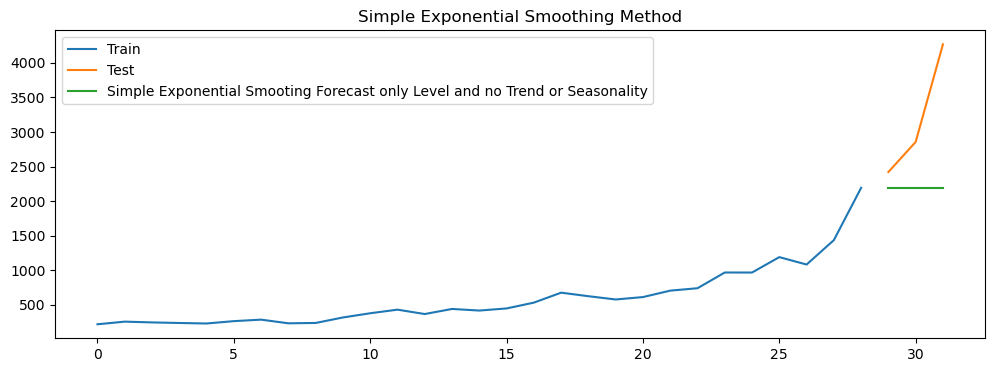

In [117]:
plt.figure(figsize=(12,4))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smooting Forecast only Level and no Trend or Seasonality')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [118]:
rmse = np.sqrt(mean_squared_error(test['Rate'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Rate']-y_hat_ses['ses_forecast'])/test['Rate'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Exponential Smoothing Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple avg method,2703.73,80.19
0,Simple Moving Average Method,2338.94,67.42
0,Simple Moving Average Method -6,2035.79,56.61
0,Simple Moving Average Method -3,1794.92,47.81
0,Simple Exponential Smoothing Method,2107.13,59.17
0,Simple Exponential Smoothing Method,2409.75,69.91
0,Simple Exponential Smoothing Method,2967.55,89.32
0,Simple Exponential Smoothing Method,1916.64,52.28
0,Simple Exponential Smoothing Method,1775.31,47.08


In [119]:
#Accuracy for Simple Average Method

accuracy = (1-(mape/100))*100
print("Accuracy", accuracy)

Accuracy 72.88


In [153]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Rate']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.42, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(3)


{'smoothing_level': 0.42, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 5.2600000000000176, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


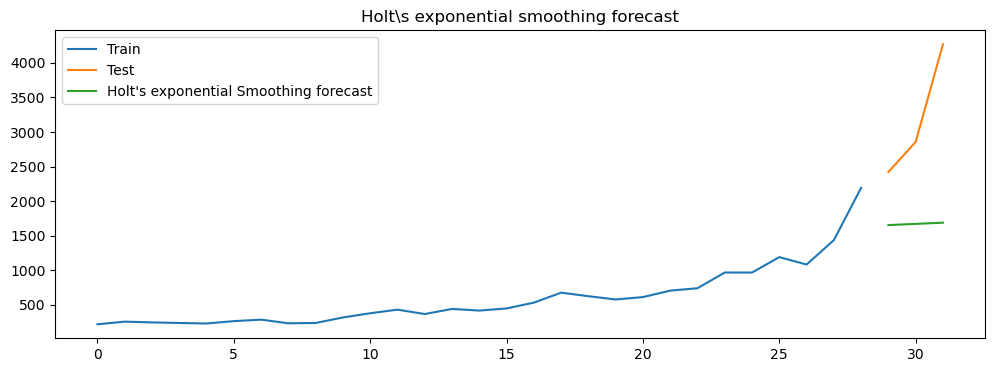

In [154]:
plt.figure(figsize=(12,4))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential Smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\s exponential smoothing forecast')
plt.show()

In [155]:
rmse = np.sqrt(mean_squared_error(test['Rate'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Rate']-y_hat_holt['holt_forecast'])/test['Rate'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt\'s Exponential Smoothing Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = pd.concat([results, tempResults])
results = results[['Method','RMSE','MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple avg method,2703.73,80.19
0,Simple Moving Average Method,2338.94,67.42
0,Simple Moving Average Method -6,2035.79,56.61
0,Simple Moving Average Method -3,1794.92,47.81
0,Simple Exponential Smoothing Method,2107.13,59.17
0,Simple Exponential Smoothing Method,2409.75,69.91
0,Simple Exponential Smoothing Method,2967.55,89.32
0,Simple Exponential Smoothing Method,1916.64,52.28
0,Simple Exponential Smoothing Method,1775.31,47.08
